## Imports

In [3]:
import pandas as pd
import numpy as np
import string
import json
from IPython.display import display
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from emoji import UNICODE_EMOJI
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

pd.options.display.max_columns = None
# Use 'display(df)' instead of 'df' to display all columns.

[nltk_data] Downloading package wordnet to /home/lilatee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lilatee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading YouTube Data

In [4]:
ytUS_df = pd.read_csv("./data/youtube_data/US_videos_5p.csv", sep=';')
ytUS_df["region"] = "US"
print(ytUS_df.shape)
# test = ytUS_df.loc[:,"description "][0]
ytUS_df.head(5)

(40949, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,NaN,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,NaN,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,NaN,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ SUBSCRIBE ► https:/...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,NaN,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,NaN,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [5]:
# Encoding error. Open GB_videos_5p.csv in VSCode and save file as UTF-16 LE.
ytGB_df = pd.read_csv("./data/youtube_data/GB_videos_5p.csv", sep=';', encoding='utf_16')
ytGB_df["region"] = "GB"
print(ytGB_df.shape)
ytGB_df.head(5)

(38916, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,NaN,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,GB
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,NaN,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,GB
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,NaN,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,NaN,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB


In [6]:
df = pd.concat([ytGB_df, ytUS_df], ignore_index=True)
print(df.shape)
df.rename(columns={"description ": "description"}, inplace=True)
df.head(5)

(79865, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,NaN,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,GB
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,NaN,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,GB
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,NaN,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,NaN,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB


## TODO
<ul>
    <li>STATYSTYKI</li>   
    <li>publish_time zamienić na 4 kolumny: godzina, dzień, miesiąc, rok + dodać dzień tygodnia</li>
    <li>trending_data zamienić na 3 kolumny: dzień, miesiąc, rok ????</li>
    <li>+ dodać może timestampy?</li>
    <li>tygodnie miesiąca???</li>
    <li>Dodać kolumnę z różnica czasu między trending_data a, publish_time</li>
    <li>liczba tagów</li>
    <li>stosunek likes/dislikes</li>
    <li>stosunek likes/views</li>
    <li>stosunek dislikes/views</li>
    <li>Statystyki każdej kolumny: unikalne, max, min, średnia, odchylenie, mediana, ile NaN</li>
    <li>dodac kolumny ze statystykami w konkretnych trening_date</li>
    <li>ATRYBUTY TEKSTOWE</li>
    <li>Wydobyć tagi do list</li>
    <li>dlugosc title i description</li>
    <li>ile % wielkich liter w title/description</li>
    <li>ile % interpunkcji, czy w ogóle jest?</li>
    <li>czy jest link w description</li>
    <li>title - usunąć stopwords, zrobić stemming, i dodać reprezentacje </li>
    <li>tags - usunąć stopwords, zrobić stemming, i dodać reprezentacje </li>
    <li>description - usunąć stopwords, zrobić stemming, i dodać reprezentacje </li>
    
</ul>

In [7]:
RE_HTTP = re.compile("http[s]?://[/\.a-zA-Z0-9]+")
def getListOfURLs(text):
    return RE_HTTP.findall(str(text))

def countEmojis(text):
    count = 0
    for em in UNICODE_EMOJI['en'].keys():
        if em in str(text):
            count += 1
    return count

In [8]:
df["title_length"] = df.apply(lambda row: len(row.title), axis=1)

df["description_length"] = df.apply(lambda row: len(str(row.description)), axis=1)

df['tags'] = df['tags'].apply(lambda tag: json.dumps(tag.replace('"','').split('|')))
df["n_of_tags"] = df.apply(lambda row: len(json.loads(row.tags)), axis=1)

df["title_capital_letters"] = df.apply(lambda row: sum(1 for l in row.title if l.isupper()), axis=1)
df["title_capital_letters_percent"] = df.apply(lambda row: row.title_capital_letters/row.title_length, axis=1)
df["title_small_letters"] = df.apply(lambda row: sum(1 for l in row.title if l.islower()), axis=1)
df["title_small_letters_percent"] = df.apply(lambda row: row.title_small_letters/row.title_length, axis=1)

df["title_punctuation"] = df.apply(lambda row: sum(1 for l in row.title if l in string.punctuation), axis=1)
df["title_punctuation_percent"] = df.apply(lambda row: sum(1 for l in row.title if l in string.punctuation)/len(row.title), axis=1)

df["title_n_of_emojis"] = df.apply(lambda row: str(countEmojis(row.title)), axis=1)

df["desc_capital_letters"] = df.apply(lambda row: sum(1 for l in str(row.description) if l.isupper()), axis=1)
df["desc_capital_letters_percent"] = df.apply(lambda row: row.desc_capital_letters/row.description_length, axis=1)
df["desc_small_letters"] = df.apply(lambda row: sum(1 for l in str(row.description) if l.islower()), axis=1)
df["desc_small_letters_percent"] = df.apply(lambda row: row.desc_small_letters/row.description_length, axis=1)

df["desc_punctuation"] = df.apply(lambda row: sum(1 for l in str(row.description) if l in string.punctuation), axis=1)
df["desc_punctuation_percent"] = df.apply(lambda row: sum(1 for l in str(row.description) if l in string.punctuation)/len(str(row.description)), axis=1)

df["desc_list_of_urls"] = df.apply(lambda row: str(getListOfURLs(row.description)), axis=1)
df["desc_n_of_urls"] = df.apply(lambda row: len(getListOfURLs(row.description)), axis=1)
df["desc_n_of_emojis"] = df.apply(lambda row: str(countEmojis(row.description)), axis=1)

In [9]:
display(df.head(5))

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region,title_length,description_length,n_of_tags,title_capital_letters,title_capital_letters_percent,title_small_letters,title_small_letters_percent,title_punctuation,title_punctuation_percent,title_n_of_emojis,desc_capital_letters,desc_capital_letters_percent,desc_small_letters,desc_small_letters_percent,desc_punctuation,desc_punctuation_percent,desc_list_of_urls,desc_n_of_urls,desc_n_of_emojis
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"[""christmas"", ""john lewis christmas"", ""john le...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB,45,821,9,7,0.155556,26,0.577778,2,0.044444,0,39,0.047503,608,0.740560,70,0.085262,"['http://bit.ly/2mboXgj', 'http://bit.ly/2hg04...",7,0
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,NaN,2017-11-12T06:24:44.000Z,"[""SNL"", ""Saturday Night Live"", ""SNL Season 43""...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,GB,41,417,36,8,0.195122,20,0.487805,5,0.121951,0,40,0.095923,276,0.661871,70,0.167866,"['http://www.nbc.com/saturday', 'http://www.nb...",7,0
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,NaN,2017-11-10T17:00:03.000Z,"[""Eminem"", ""Walk"", ""On"", ""Water"", ""Aftermath/S...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,GB,42,594,6,6,0.142857,25,0.595238,4,0.095238,0,29,0.048822,433,0.728956,94,0.158249,"['http://shady.sr/WOWEminem', 'https://goo.gl/...",14,0
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,NaN,2017-11-13T02:30:38.000Z,"[""Salford City FC"", ""Salford City"", ""Salford"",...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB,76,396,9,8,0.105263,52,0.684211,1,0.013158,0,28,0.070707,283,0.714646,45,0.113636,"['https://www.facebook.com/SalfordCityFC/', 'h...",5,0
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,NaN,2017-11-13T01:45:13.000Z,"[""[none]""]",9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB,55,151,1,2,0.036364,44,0.800000,1,0.018182,0,6,0.039735,118,0.781457,6,0.039735,[],0,0


In [10]:
all_tags_words = []
for tags in df.loc[:,"tags"]:
    tags = json.loads(tags.lower())
    single_words = ' '.join(tags).split(' ')
    all_tags_words.extend(single_words)

In [12]:
all_words_without_stopwords = [word for word in all_tags_words if word not in stopwords.words('english')]

wnl = WordNetLemmatizer()
all_words_lemmatized = [wnl.lemmatize(word) for word in all_words_without_stopwords]

Text(0.5, 1.0, 'Najpopularniejsze tagi')

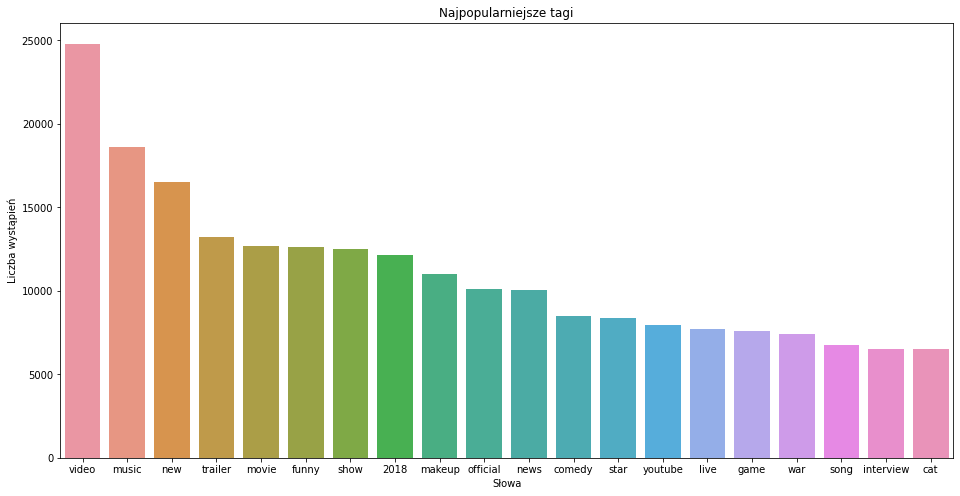

In [19]:
cnt_tags = Counter(all_words_lemmatized)
cnt_tags = cnt_tags.most_common()

xx, yy = zip(*cnt_tags[:20])
plt.figure(figsize=(16,8))
sns.barplot(x=list(xx),y=list(yy))
plt.xlabel("Słowa")
plt.ylabel("Liczba wystąpień")
plt.title("Najpopularniejsze tagi")

In [14]:
def removePunctuationInString(text):
    new_text = [char for char in text if char not in string.punctuation]
    return ''.join(new_text)

In [15]:
all_words_title = []
for title in df.loc[:,"title"]:
    title = title.lower()
    single_words = title.split(' ')
    all_words_title.extend(single_words)
    
all_words_title = [removePunctuationInString(word) for word in all_words_title]
all_words_title_without_stopwords = [word for word in all_words_title if word not in stopwords.words('english') and word is not '']

wnl = WordNetLemmatizer()
all_words_title_lemmatized = [wnl.lemmatize(word) for word in all_words_title_without_stopwords]

Text(0.5, 1.0, 'Najpopularniejsze słowa w tytułach')

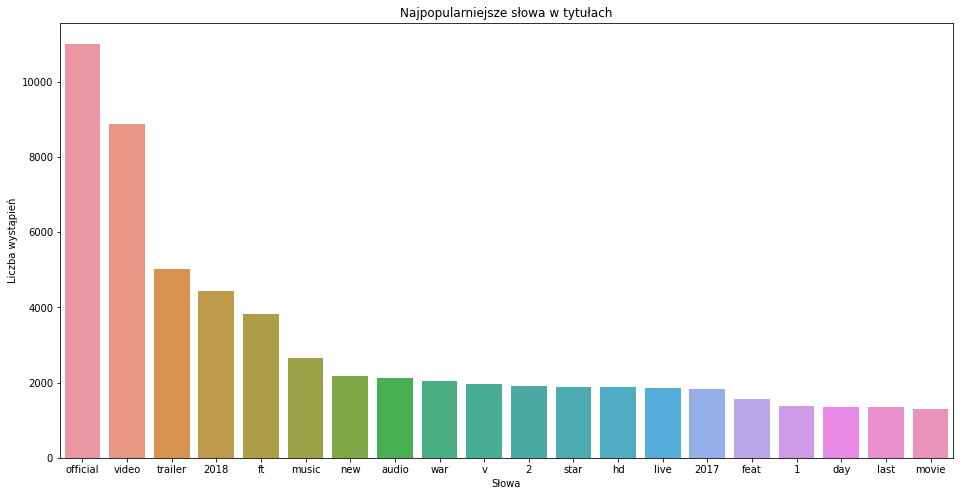

In [20]:
cnt_title = Counter(all_words_title_lemmatized)
cnt_title = cnt_title.most_common()

xx, yy = zip(*cnt_title[:20])
plt.figure(figsize=(16,8))
sns.barplot(x=list(xx),y=list(yy))
plt.xlabel("Słowa")
plt.ylabel("Liczba wystąpień")
plt.title("Najpopularniejsze słowa w tytułach")